**MRI Brain Tumor Detection using** **CNN**

Magnetic Resonance Imaging (MRI) is a medical imaging technique that uses a magnetic field and radio waves to generate images of the body's internal structures. It is widely used to detect brain tumors, which can be challenging to diagnose using other imaging techniques. Convolutional Neural Networks (CNNs) are a type of deep learning algorithm that can be used for image classification tasks, including the detection of brain tumors in MRI images.

Here is a step-by-step guide for building a CNN model for MRI brain tumor detection:

Prepare the dataset: You will need a dataset of MRI brain scans, labeled as either 'tumor' or 'non-tumor'. You can use publicly available datasets such as the Brain Tumor Segmentation (BraTS) dataset, which contains MRI scans of patients with brain tumors, or you can create your own dataset by collecting MRI scans from hospitals or clinics.

Preprocess the data: Preprocessing the data involves resizing the images to a fixed size, normalizing the pixel values, and splitting the dataset into training and testing sets.

Build the CNN model: The CNN model should consist of multiple convolutional layers followed by pooling layers, with a fully connected layer at the end for classification. You can use frameworks like Keras or PyTorch to build your CNN model.

Train the model: Train the CNN model using the training set and evaluate its performance on the validation set. You can experiment with different hyperparameters, such as learning rate, batch size, and number of epochs, to improve the model's performance.

Evaluate the model: Evaluate the trained model on the test set and calculate the accuracy, precision, recall, and F1 score to measure its performance

**Google Colab allows you to mount your Google Drive account to the Colab virtual machine, which allows you to access your files from your Google Drive account directly within the Colab environment.**

Google Colab allows you to mount your Google Drive account to the Colab virtual machine, which allows you to access your files from your Google Drive account directly within the Colab environment.

Here are the steps to mount your Google Drive in Google Colab:

Open a new notebook in Google Colab.
Click on the "Mount Drive" icon on the left-hand side of the notebook.
A pop-up window will appear, prompting you to sign in to your Google account. Once you've signed in, click "Allow" to grant Colab permission to access your Google Drive.
Once you've granted permission, your Google Drive will be mounted to the virtual machine, and you should see a message indicating that it has been successfully mounted.
You can access your files by navigating to the file directory where they are stored in your Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**These libraries can be installed using pip, the package installer for Python.** For example, to install TensorFlow, you can run the following command in your terminal or command prompt:
*`pip install tensorflow`*

In [2]:
import pandas as pd
import os
from os import environ
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import tensorflow as tf
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
import PIL.Image
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from IPython.display import display, Image
from tkinter import *
from PIL import ImageTk, Image


**Here are some publicly available datasets that you can use for brain tumor detection using MRI images:**

The Brain Tumor Segmentation (BraTS) dataset: This dataset contains MRI scans of patients with brain tumors, along with ground truth segmentations of the tumors. The dataset includes images from multiple institutions and multiple modalities (T1, T2, FLAIR, and post-contrast T1), making it suitable for training deep learning models. You can download the dataset from the BraTS website: https://www.med.upenn.edu/cbica/brats2021/data.html

The LGG/GBM dataset: This dataset contains MRI scans of patients with low-grade gliomas (LGG) and glioblastoma multiforme (GBM) tumors. It includes T1, T1-contrast, T2, and FLAIR modalities, along with ground truth segmentations of the tumors. You can download the dataset from the Cancer Imaging Archive (TCIA) website: https://wiki.cancerimagingarchive.net/display/Public/TCGA-LGG#36e0d317bcb84c12af42b6008c7d6e87

The MICCAI Brain Tumor Segmentation (BRATS) Challenge datasets: These datasets were used for the annual BRATS challenge, which aims to compare state-of-the-art methods for brain tumor segmentation. The datasets include MRI scans of patients with brain tumors, along with ground truth segmentations of the tumors. You can download the datasets from the BRATS website: https://www.med.upenn.edu/cbica/brats2021/data.html

When using these datasets, be sure to follow the terms of use and citation requirements specified by the data owners.


In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping 

Assuming that you have a list of filepaths that you want to use to create a pandas DataFrame, you can use a loop to iterate over the filepaths, read in the data from each file, and append the data to a list. Then, you can use the list to create the DataFrame.

In [4]:
# Creating dataframe by iterating through filepaths
tumor_dir=r'/content/drive/MyDrive/BrainTtumorDataset/yes'
healthy_dir=r'/content/drive/MyDrive/BrainTtumorDataset/no'
filepaths = []
labels= []
dict_list = [tumor_dir, healthy_dir]
for i, j in enumerate(dict_list): 
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('tumor')
        else:
          labels.append('non-tumor') 
    
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
tumor_data = pd.concat([Fseries,Lseries], axis=1)
tumor_df = pd.DataFrame(tumor_data)
print(tumor_df.head())
print(tumor_df["labels"].value_counts())

                                           filepaths labels
0  /content/drive/MyDrive/BrainTtumorDataset/yes/...  tumor
1  /content/drive/MyDrive/BrainTtumorDataset/yes/...  tumor
2  /content/drive/MyDrive/BrainTtumorDataset/yes/...  tumor
3  /content/drive/MyDrive/BrainTtumorDataset/yes/...  tumor
4  /content/drive/MyDrive/BrainTtumorDataset/yes/...  tumor
tumor        155
non-tumor     98
Name: labels, dtype: int64


Brain MRI scans with and without tumours total 253 images.

In [5]:
#shape of datatset
tumor_df.shape

(253, 2)

We divided the test into 20%-sized test and train halves. Despite being a random value, Random size = 42 is the most popular one. The train set split maintained at 80% for 10% validation after that.

In [6]:
#splitting data
train_images, test_images = train_test_split(tumor_df, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(tumor_df, test_size=0.1, random_state=42)

The shapes of the train, test, and validation parts of a dataset depend on how you split your data. Typically, you want to split your dataset into three parts: a training set, a validation set, and a test set. The training set is used to train your model, the validation set is used to tune hyperparameters and evaluate performance during training, and the test set is used to evaluate the final performance of your trained model on unseen data.

In [7]:
#shape of splitted data
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(227, 2)
(51, 2)
(26, 2)
(202, 2)


Data augmentation the data in our collection by cropping, flipping, zooming, etc. By using transactions, it is a method that enables us to increase the amount of data. By growing our dataset, we are helping to better train the model.

The model's issue with overfitting is solved by data augmentation!

RGB data make up our data. Dimension 244x244, default batch size is 32. Model accuracy can be reduced by larger batch sizes.

One of "categorical," "binary," "sparse," "input," or "None" is the class mode option. "Categoric" is the default. the kind of label arrays that are returned is determined by: - 2D one-hot encoded labels will serve as "categorical"

In [8]:
#Generate batches of tensor image data with real-time data augmentation.
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #Used for Sequential Model
                                      batch_size=32,
                                      shuffle=False           
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 227 validated image filenames belonging to 2 classes.
Found 51 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


In a classification problem, the labels are usually integers or strings that represent the classes that you want to predict. For example, in an image classification problem, the labels might be integers that represent different types of objects in the images, such as cars, planes, or boats.

When you create a data generator for training a deep learning model using ImageDataGenerator in Keras, the flow_from_directory() method creates a mapping between the class names and their corresponding integer labels. This mapping is stored in the class_indices attribute of the generator.

The code list(train.class_indices.keys()) extracts the names of the classes from this mapping and stores them in a list. This list can then be used later in your code, for example, to display the names of the predicted classes instead of their integer labels.


In [9]:
classes=list(train.class_indices.keys())
print (classes)

['non-tumor', 'tumor']


In [10]:
def show_brain_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator 
    plt.figure(figsize=(16,16))
    length = len(labels)
    r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        if class_name=='tumor':
          plt.title(class_name, color="red",fontsize=16)
        else:
          plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

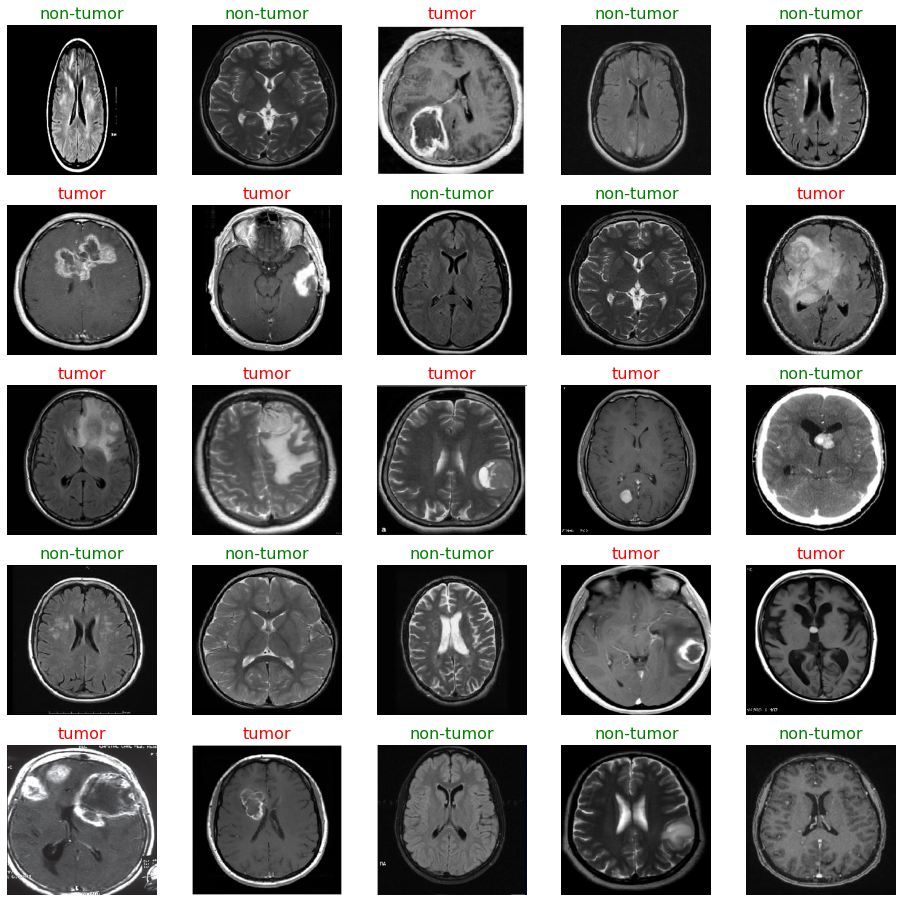

In [11]:
show_brain_images(train)

**Model Training**

we're using the Keras Sequential model to build a simple CNN model with two convolutional layers, two pooling layers, and two fully connected layers. The input images are expected to have shape (244, 244, 3).

The Conv2D layer creates a convolutional layer with 32 filters, each with size (3, 3), and applies the ReLU activation function. The MaxPooling2D layer creates a pooling layer that reduces the spatial dimensions of the output by a factor of 2.

We repeat this pattern with another convolutional layer and pooling layer, but this time with 64 filters.

The Flatten layer flattens the output from the convolutional and pooling layers, so that it can be passed to the fully connected layers. The Dense layer creates a fully connected layer with 64 units and applies the ReLU activation function. Finally, we add another Dense layer with a single unit and the sigmoid activation function, which produces a probability output for the binary classification problem.

We compile the model using the rmsprop optimizer, the binary crossentropy loss function, and the accuracy metric. We print the model summary to see the structure of the model and the number of parameters.

Note that this is just an example model and the architecture may need to be modified based on the specific requirements of your problem.


In [12]:
#Defining Sequential Model
model = Sequential() #Class
#Defining conv-pool layer
model.add(Conv2D(filters=32,kernel_size=(2,2),strides=(1,1), activation="relu", padding="valid",input_shape=(244,244,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding flatten layer
model.add(Flatten())

#Adding dense layers with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))

#Output layer
model.add(Dense(2, activation="sigmoid")) #Sigmoid is used for binary.(0-healthy 1-cancer) Use Softmax for Mutliclass.


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 243, 243, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 468512)            0         
                                                                 
 dense (Dense)               (None, 128)               59969664  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                        

The **fit()** method is used to train a Keras model on a given dataset. It takes as input the training dataset (in this case, the train generator), the validation dataset (in this case, the val generator), the number of epochs to train the model for (epochs=10), and a verbosity level to control the amount of logging that is output during the training process (verbose=1).

The **fit()** method then iterates over the training dataset for the specified number of epochs, updating the model's parameters at each iteration based on the gradients computed during the forward and backward passes. At the end of each epoch, the model's performance is evaluated on the validation dataset and the validation loss and accuracy are recorded.

The **fit()** method returns a History object that contains information about the training process, such as the loss and accuracy values at each epoch. This object can be used to visualize the training history and to make decisions about how to adjust the model's architecture or training parameters.

In [13]:
#fitting model
History = model.fit(train, validation_data= val, epochs=10,verbose=1)

Epoch 1/10
8/8 [==============================] - 57s 6s/step - loss: 11.8741 - accuracy: 0.5859 - val_loss: 5.8905 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 1s 154ms/step - loss: 7.4543 - accuracy: 0.6388 - val_loss: 4.2865 - val_accuracy: 0.7692
Epoch 3/10
8/8 [==============================] - 1s 160ms/step - loss: 4.8020 - accuracy: 0.6432 - val_loss: 3.2049 - val_accuracy: 0.6154
Epoch 4/10
8/8 [==============================] - 1s 158ms/step - loss: 2.8275 - accuracy: 0.6960 - val_loss: 2.9013 - val_accuracy: 0.6538
Epoch 5/10
8/8 [==============================] - 1s 176ms/step - loss: 1.1132 - accuracy: 0.7753 - val_loss: 1.7024 - val_accuracy: 0.7692
Epoch 6/10
8/8 [==============================] - 2s 212ms/step - loss: 0.7127 - accuracy: 0.8326 - val_loss: 1.6503 - val_accuracy: 0.7308
Epoch 7/10
8/8 [==============================] - 1s 161ms/step - loss: 0.3578 - accuracy: 0.8811 - val_loss: 1.2782 - val_accuracy: 0.7308
Epoch 8/10
8/8 [=====

The **training accuracy** is stored in the "`accuracy`" key of the History.history dictionary, while the validation accuracy is stored in the `"val_accuracy"` key.

These values can be used to evaluate the performance of the model during training and to make decisions about how to adjust the model's architecture or training parameters.

The **training loss** is stored in the "*loss*" key of the History.history dictionary, while the validation loss is stored in the *`"val_loss"`* key.

These values can be used to evaluate the performance of the model during training and to make decisions about how to adjust the model's architecture or training parameters.

Text(0.5, 1.0, 'Training and Validation Accuracy')

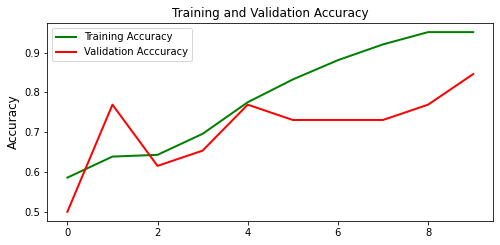

In [17]:
acc = History.history["accuracy"] # Report of model
val_acc = History.history["val_accuracy"] # History of validation data

loss = History.history["loss"]        # Training loss
val_loss = History.history["val_loss"] # Validation loss

plt.figure(figsize=(8,8))
plt.subplot(2,1,1) # 2 rows and 1 columns
#Plotting respective accuracy
plt.plot(acc,label="Training Accuracy",color='green',linewidth=2)
plt.plot(val_acc, label="Validation Acccuracy",color='red', linewidth=2)

plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)

Text(0.5, 1.0, 'Training and Validation Losses')

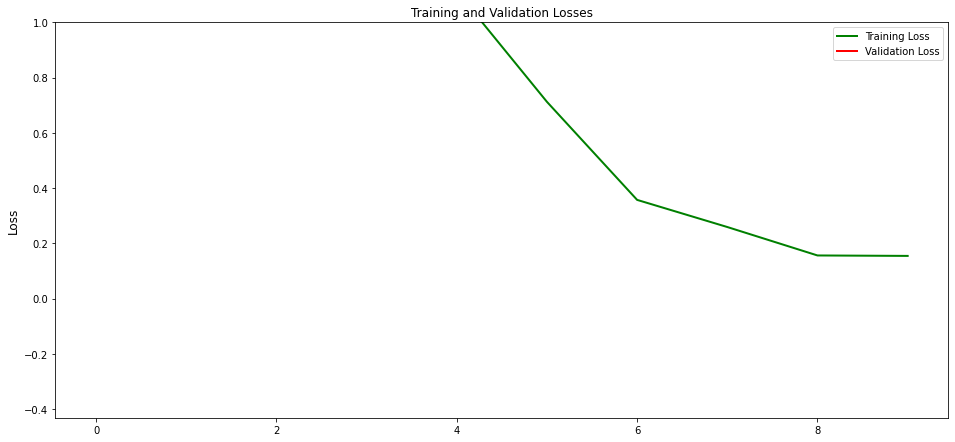

In [20]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
 
plt.plot(loss, label="Training Loss",color='green', linewidth=2)      #Training loss
plt.plot(val_loss, label="Validation Loss",color='red', linewidth=2) # Validation Loss

plt.legend()
plt.ylim([min(plt.ylim()),1])
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Losses", fontsize=12)

The `evaluate()` method takes as input the test dataset (test), and an optional verbosity level (verbose=1 in this case, which means that the method will output the evaluation results).

The method then computes the loss and accuracy of the model on the test dataset and returns them as a tuple.

In [21]:
model.evaluate(test, verbose=1)

2/2 [==============================] - 0s 151ms/step - loss: 0.7438 - accuracy: 0.9020


[0.7437552809715271, 0.9019607901573181]

The **predict()** method takes as input the test dataset (test) and returns a numpy array containing the predicted class probabilities for each example in the dataset. Each row in the output array corresponds to an example in the test dataset, and each column corresponds to a class.

In [22]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

2/2 [==============================] - 0s 92ms/step


The **classification_report()** function from scikit-learn is then used to generate a report showing various classification metrics such as precision, recall, and F1-score for each class based on the predicted class labels (pred2) and the true class labels (y_test).

The **accuracy_score()** function is then used to compute the overall accuracy of the model on the test dataset, based on the predicted class labels and the true class labels.

In [23]:
y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:",accuracy_score(y_test, pred2)*100,"%")

              precision    recall  f1-score   support

   non-tumor       1.00      0.79      0.88        24
       tumor       0.84      1.00      0.92        27

    accuracy                           0.90        51
   macro avg       0.92      0.90      0.90        51
weighted avg       0.92      0.90      0.90        51

Accuracy of the Model: 90.19607843137256 %


A confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for each class.

To create a confusion matrix for the predictions made by the model, you can use the confusion_matrix() function from scikit-learn

<Axes: >

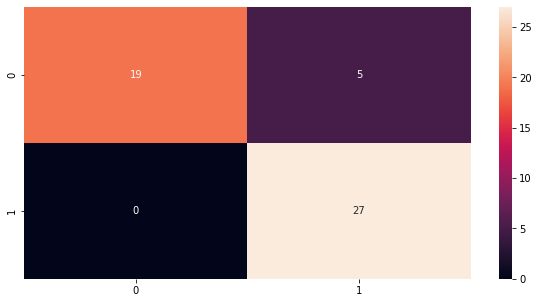

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt = 'g')
#cmap='Greens'


**Testing new images **

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [26]:
def img_pred(uploader):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(244,244))
    img = img.reshape(1,244,244,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        print('\tTumor')
    elif p==1:
        print('\tNon Tumor')
    else:
        p=='NOT SURE'


In [27]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

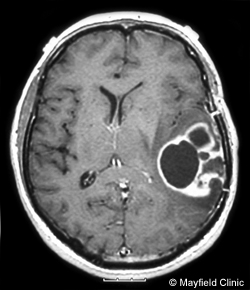

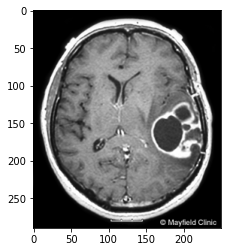

In [28]:
from PIL import Image

for name, file_info in uploader.value.items():
  img3 = Image.open(io.BytesIO(file_info['content']))
  img3.show(title=None, command=None)
  plt.imshow(img3)
  

button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])




In [29]:
print(uploader)

FileUpload(value={'Y73.jpg': {'metadata': {'name': 'Y73.jpg', 'type': 'image/jpeg', 'size': 56546, 'lastModified': 1618410688761}, 'content': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00d\x00\x00\xff\xee\x00\x0eAdobe\x00d\xc0\x00\x00\x00\x01\xff\xe1F\xechttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 4.2-c020 1.124078, Tue Sep 11 2007 23:21:40        ">\n <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n  <rdf:Description rdf:about=""\n    xmlns:dc="http://purl.org/dc/elements/1.1/"\n    xmlns:xap="http://ns.adobe.com/xap/1.0/"\n    xmlns:xapMM="http://ns.adobe.com/xap/1.0/mm/"\n    xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#"\n    xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/"\n    xmlns:tiff="http://ns.adobe.com/tiff/1.0/"\n    xmlns:exif="http://ns.adobe.com/exif/1.0/"\